In [1]:
import pandas as pd

def loadData():
    countryData = pd.read_csv("countries.csv", decimal=",")
    caseData = pd.read_csv("cases.csv", decimal=",")
    
    return (countryData, caseData)

In [2]:
countryData, caseData = loadData()

countryData



,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EU ROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,West Bank,NEAR EAST,2460492,5860,419.9,0.00,2.98,19.62,800.0,NaN,145.2,16.90,18.97,64.13,3.0,31.67,3.92,0.090,0.280,0.630
223,Western Sahara,NORTHERN AFRICA,273008,266000,1.0,0.42,NaN,NaN,NaN,NaN,NaN,0.02,0.00,99.98,1.0,NaN,NaN,NaN,NaN,0.400
224,Yemen,NEAR EAST,21456188,527970,40.6,0.36,0.00,61.50,800.0,50.2,37.2,2.78,0.24,96.98,1.0,42.89,8.30,0.135,0.472,0.393
225,Zambia,SUB-SAHARAN AFRICA,11502010,752614,15.3,0.00,0.00,88.29,800.0,80.6,8.2,7.08,0.03,92.90,2.0,41.00,19.93,0.220,0.290,0.489


In [3]:
countryData = countryData.dropna()
countryData.columns
countryData = countryData.filter(['Country','Pop. Density (per sq. mi.)','Infant mortality (per 1000 births)',
                    'GDP ($ per capita)','Literacy (%)','Birthrate','Deathrate', 'Region', 'Coastline (coast/area ratio)'])

labels = countryData['Region'].value_counts(ascending=True).index.tolist()
codes = range(1, len(labels)+1)
countryData['Region'].replace(labels, codes, inplace=True)

In [4]:
countryData

,Country,Pop. Density (per sq. mi.),Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Birthrate,Deathrate,Region,Coastline (coast/area ratio)
0,Afghanistan,48.0,163.07,700.0,36.0,46.60,20.34,9,0.00
1,Albania,124.6,21.52,4500.0,86.5,15.11,5.22,4,1.26
2,Algeria,13.8,31.00,6000.0,70.0,17.14,4.61,3,0.04
6,Anguilla,132.1,21.03,8600.0,95.0,14.17,5.34,10,59.80
7,Antigua & Barbuda,156.0,19.46,11000.0,89.0,16.93,5.37,10,34.54
...,...,...,...,...,...,...,...,...,...
218,Venezuela,28.2,22.20,4800.0,93.4,18.71,4.92,10,0.31
219,Vietnam,256.1,25.95,2500.0,90.3,16.86,6.22,9,1.05
224,Yemen,40.6,61.50,800.0,50.2,42.89,8.30,7,0.36
225,Zambia,15.3,88.29,800.0,80.6,41.00,19.93,11,0.00


In [5]:
caseData = caseData.dropna()
caseData = caseData.sort_values("Date", ascending=False)
caseData = caseData.drop_duplicates(subset="Entity", keep="first" )
caseData.columns
caseData = caseData.drop(["Code", "Date"], axis='columns')
caseData


,Entity,Total confirmed cases of COVID-19 per million people (cases per million)
12016,Zimbabwe,2.288
1887,Burkina Faso,31.048
9315,Senegal,61.156
9369,Serbia,1352.762
9418,Seychelles,111.857
...,...,...
11928,Yemen,0.235
190,Albania,271.735
252,Algeria,94.73
11905,World,424.334


In [6]:
case_obj = caseData.select_dtypes(["object"])
caseData[case_obj.columns] = case_obj.apply(lambda x:x.str.strip())
caseData = caseData.rename(columns={"Entity":"Country"})
caseData.dtypes

Country                                                                     object
Total confirmed cases of COVID-19 per million people (cases per million)    object
dtype: object

In [7]:
countryData.dtypes

Country                                object
Pop. Density (per sq. mi.)            float64
Infant mortality (per 1000 births)    float64
GDP ($ per capita)                    float64
Literacy (%)                          float64
Birthrate                             float64
Deathrate                             float64
Region                                  int64
Coastline (coast/area ratio)          float64
dtype: object

In [8]:
caseData.Country = [c.strip() for c in caseData.Country]
countryData.Country = [c.strip() for c in countryData.Country]
merged = pd.merge(left=caseData, right=countryData, how="inner")

In [9]:
mergedCountries = merged.Country
merged = merged.drop('Country', axis="columns")


In [10]:
merged = merged.rename(columns={"Total confirmed cases of COVID-19 per million people (cases per million)":"COVID"})


In [11]:
merged.COVID = pd.to_numeric(merged.COVID)




In [12]:
def is_outlier(points, thresh=3.5):
    """
    Returns a boolean array with True if points are outliers and False 
    otherwise.

    Parameters:
    -----------
        points : An numobservations by numdimensions array of observations
        thresh : The modified z-score to use as a threshold. Observations with
            a modified z-score (based on the median absolute deviation) greater
            than this value will be classified as outliers.

    Returns:
    --------
        mask : A numobservations-length boolean array.

    References:
    ----------
        Boris Iglewicz and David Hoaglin (1993), "Volume 16: How to Detect and
        Handle Outliers", The ASQC Basic References in Quality Control:
        Statistical Techniques, Edward F. Mykytka, Ph.D., Editor. 
    """
    if len(points.shape) == 1:
        points = points[:,None]
    median = np.median(points, axis=0)
    diff = np.sum((points - median)**2, axis=-1)
    diff = np.sqrt(diff)
    med_abs_deviation = np.median(diff)

    modified_z_score = 0.6745 * diff / med_abs_deviation

    return modified_z_score > thresh

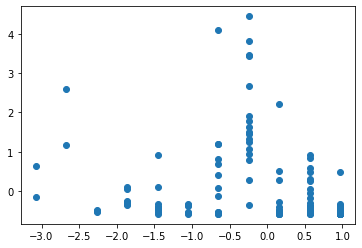

In [26]:

merged_norm = (merged-merged.mean())/merged.std()

import matplotlib.pyplot as plt
plt.scatter(merged_norm["Region"], merged_norm.COVID)


In [27]:
merged_norm.describe()

,COVID,Pop. Density (per sq. mi.),Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Birthrate,Deathrate,Region,Coastline (coast/area ratio)
count,1.510000e+02,1.510000e+02,1.510000e+02,1.510000e+02,1.510000e+02,1.510000e+02,1.510000e+02,1.510000e+02,1.510000e+02
mean,7.646569e-17,1.176395e-17,1.646953e-16,5.293779e-17,1.823413e-16,9.411162e-17,2.852759e-16,-2.882168e-16,3.529186e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-5.769957e-01,-3.148868e-01,-1.032127e+00,-8.846195e-01,-3.106553e+00,-1.308797e+00,-1.386912e+00,-3.076275e+00,-2.868593e-01
25%,-5.500056e-01,-2.693618e-01,-8.205402e-01,-7.501956e-01,-6.160073e-01,-8.339885e-01,-7.199573e-01,-6.484831e-01,-2.834699e-01
50%,-4.648817e-01,-1.995448e-01,-4.111774e-01,-4.365398e-01,4.737594e-01,-2.250140e-01,-2.714880e-01,1.607809e-01,-2.702890e-01
75%,9.691176e-02,-7.718505e-02,6.891576e-01,4.098330e-01,8.239541e-01,8.226138e-01,4.826687e-01,9.700449e-01,-1.846133e-01
max,4.444403e+00,1.134599e+01,3.408989e+00,2.829464e+00,9.292574e-01,2.392095e+00,3.850980e+00,9.700449e-01,7.797538e+00


In [15]:
x = merged_norm.drop("COVID", axis="columns")
y = merged_norm.COVID

y_mean = merged.COVID.mean()
y_std = merged.COVID.std()

y_std

1049.2352355356968

In [16]:
y.shape

(151,)

In [17]:
#Linear Regression

from sklearn.linear_model import LinearRegression
from sklearn import metrics
import numpy as np


linreg = LinearRegression()

linreg.fit(x,y)

y_pred = linreg.predict(x)

result = pd.DataFrame({"Country": mergedCountries, "Actual":(y*y_std)+y_mean, 
                       "Predicted":(y_pred*y_std)+y_mean, "Difference": abs(((y*y_std)+y_mean)-((y_pred*y_std)+y_mean))})



print('Mean Absolute Error:', metrics.mean_absolute_error(y, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, y_pred)))
result.sort_values("Difference", ascending = False)

Mean Absolute Error: 0.39927568148431614
Mean Squared Error: 0.4833707198153175
Root Mean Squared Error: 0.6952486748029927


,Country,Actual,Predicted,Difference
25,Qatar,4892.644,1540.494031,3352.149969
15,Spain,4603.080,1490.874491,3112.205509
93,Iceland,5268.864,2193.393513,3075.470487
64,Belgium,4230.684,2096.661838,2134.022162
96,Ireland,4219.089,2103.781913,2115.307087
...,...,...,...,...
72,Cote d'Ivoire,50.534,44.484128,6.049872
23,Comoros,1.150,6.879121,5.729121
84,Madagascar,4.875,9.568416,4.693416
30,Chad,4.444,0.050124,4.393876


In [18]:
#SGD Regression

from sklearn.linear_model import SGDRegressor
from sklearn import metrics
import numpy as np


linreg = SGDRegressor()

linreg.fit(x,y)

y_pred = linreg.predict(x)

result = pd.DataFrame({"Country": mergedCountries, "Actual":(y*y_std)+y_mean, 
                       "Predicted":(y_pred*y_std)+y_mean, "Difference": abs(((y*y_std)+y_mean)-((y_pred*y_std)+y_mean))})

print('Mean Absolute Error:', metrics.mean_absolute_error(y, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, y_pred)))
result.sort_values("Difference", ascending = False)

Mean Absolute Error: 0.40123703848609715
Mean Squared Error: 0.4899670479930719
Root Mean Squared Error: 0.6999764624564685


,Country,Actual,Predicted,Difference
25,Qatar,4892.644,1430.936631,3461.707369
93,Iceland,5268.864,2046.179194,3222.684806
15,Spain,4603.080,1485.450080,3117.629920
96,Ireland,4219.089,1979.975411,2239.113589
64,Belgium,4230.684,2026.082162,2204.601838
...,...,...,...,...
55,Bolivia,105.285,98.427473,6.857527
85,Malawi,1.934,-1.492259,3.426259
30,Chad,4.444,2.342314,2.101686
147,Yemen,0.235,2.226451,1.991451


In [28]:
#Lasso Regression

from sklearn.linear_model import Lasso
from sklearn import metrics
import numpy as np


reg = Lasso()

reg.fit(x,y)

y_pred = reg.predict(x)

result = pd.DataFrame({"Country": mergedCountries, "Actual":(y*y_std)+y_mean, 
                       "Predicted":(y_pred*y_std)+y_mean, "Difference": abs(((y*y_std)+y_mean)-((y_pred*y_std)+y_mean))})

print('Mean Absolute Error:', metrics.mean_absolute_error(y, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, y_pred)))
result.sort_values("Difference", ascending = False)

Mean Absolute Error: 0.6999463745782981
Mean Squared Error: 0.9933774834437085
Root Mean Squared Error: 0.9966832412776431


,Country,Actual,Predicted,Difference
93,Iceland,5268.864,605.639265,4663.224735
25,Qatar,4892.644,605.639265,4287.004735
15,Spain,4603.080,605.639265,3997.440735
64,Belgium,4230.684,605.639265,3625.044735
96,Ireland,4219.089,605.639265,3613.449735
...,...,...,...,...
124,Czech Republic,722.478,605.639265,116.838735
16,Saudi Arabia,692.167,605.639265,86.527735
115,Dominican Republic,671.835,605.639265,66.195735
22,Puerto Rico,550.538,605.639265,55.101265


In [20]:
#SVM Regression

from sklearn import svm
from sklearn import metrics
import numpy as np


reg = svm.SVR()

reg.fit(x,y)

y_pred = reg.predict(x)

result = pd.DataFrame({"Country": mergedCountries, "Actual":(y*y_std)+y_mean, 
                       "Predicted":(y_pred*y_std)+y_mean, "Difference": abs(((y*y_std)+y_mean)-((y_pred*y_std)+y_mean))})

print('Mean Absolute Error:', metrics.mean_absolute_error(y, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, y_pred)))
result.sort_values("Difference", ascending = False)

Mean Absolute Error: 0.33936023332828047
Mean Squared Error: 0.4619820753833371
Root Mean Squared Error: 0.6796926330212334


,Country,Actual,Predicted,Difference
25,Qatar,4892.644,1315.275641,3577.368359
93,Iceland,5268.864,1947.485001,3321.378999
15,Spain,4603.080,1356.938583,3246.141417
96,Ireland,4219.089,1949.679368,2269.409632
64,Belgium,4230.684,1980.607431,2250.076569
...,...,...,...,...
99,Haiti,7.454,-2.586698,10.040698
125,Pakistan,82.004,72.700873,9.303127
72,Cote d'Ivoire,50.534,52.305656,1.771656
100,Guyana,104.252,102.554365,1.697635


In [21]:
#KNeighbors Regression

from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics
import numpy as np


reg = KNeighborsRegressor()

reg.fit(x,y)

y_pred = reg.predict(x)

result = pd.DataFrame({"Country": mergedCountries, "Actual":(y*y_std)+y_mean, 
                       "Predicted":(y_pred*y_std)+y_mean, "Difference": abs(((y*y_std)+y_mean)-((y_pred*y_std)+y_mean))})

print('Mean Absolute Error:', metrics.mean_absolute_error(y, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, y_pred)))
result.sort_values("Difference", ascending = False)

Mean Absolute Error: 0.34147192295444434
Mean Squared Error: 0.393499824806669
Root Mean Squared Error: 0.6272956438607469


,Country,Actual,Predicted,Difference
25,Qatar,4892.644,1831.8120,3060.8320
15,Spain,4603.080,2076.0642,2527.0158
44,United States,3334.659,1197.7788,2136.8802
39,Australia,265.374,2396.5884,2131.2144
105,Japan,114.994,2242.3802,2127.3862
...,...,...,...,...
123,Oman,479.182,477.2718,1.9102
117,Niger,30.074,28.2142,1.8598
5,Cameroon,77.941,76.3452,1.5958
99,Haiti,7.454,8.3986,0.9446


In [22]:
#NN MPLRegresion

from sklearn.neural_network import MLPRegressor
from sklearn import metrics
import numpy as np


reg = MLPRegressor(max_iter=10000)

reg.fit(x,y)

y_pred = reg.predict(x)

result = pd.DataFrame({"Country": mergedCountries, "Actual":(y*y_std)+y_mean, 
                       "Predicted":(y_pred*y_std)+y_mean, "Difference": abs(((y*y_std)+y_mean)-((y_pred*y_std)+y_mean))})

print('Mean Absolute Error:', metrics.mean_absolute_error(y, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, y_pred)))
result.sort_values("Difference", ascending = False)

Mean Absolute Error: 0.1902916768939765
Mean Squared Error: 0.11299094439329266
Root Mean Squared Error: 0.33614125660693994


,Country,Actual,Predicted,Difference
15,Spain,4603.080,2640.491809,1962.588191
40,United Arab Emirates,1318.248,2511.491299,1193.243299
25,Qatar,4892.644,3719.513387,1173.130613
93,Iceland,5268.864,4104.986819,1163.877181
39,Australia,265.374,1280.450940,1015.076940
...,...,...,...,...
36,Uganda,1.858,-0.550040,2.408040
9,Somalia,37.815,39.660785,1.845785
80,Liberia,30.053,30.693533,0.640533
106,Jordan,44.986,45.476138,0.490138


In [32]:
from sklearn.ensemble import GradientBoostingRegressor
#Gradient Boosting
from sklearn import metrics
import numpy as np


reg = GradientBoostingRegressor(n_estimators=100)

reg.fit(x,y)

y_pred = reg.predict(x)

result = pd.DataFrame({"Country": mergedCountries, "Actual":(y*y_std)+y_mean, 
                       "Predicted":(y_pred*y_std)+y_mean, "Difference": abs(((y*y_std)+y_mean)-((y_pred*y_std)+y_mean))})

print('Mean Absolute Error:', metrics.mean_absolute_error(y, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, y_pred)))
result.sort_values("Difference", ascending = False)
reg.predict()

Mean Absolute Error: 0.07517322245015143
Mean Squared Error: 0.011619274338359343
Root Mean Squared Error: 0.10779273787393724


,Country,Actual,Predicted,Difference
126,Panama,1557.442,1106.007649,451.434351
25,Qatar,4892.644,4442.975835,449.668165
43,Armenia,724.884,382.921188,341.962812
65,Taiwan,18.013,322.545355,304.532355
67,Belarus,1578.632,1275.702611,302.929389
...,...,...,...,...
5,Cameroon,77.941,76.139906,1.801094
29,Rwanda,19.225,20.123313,0.898313
119,Nigeria,10.527,9.630786,0.896214
132,Mauritania,1.721,2.000858,0.279858


In [24]:
from sklearn.ensemble import RandomForestRegressor
#Random Forest
from sklearn import metrics
import numpy as np


reg = RandomForestRegressor()

reg.fit(x,y)

y_pred = reg.predict(x)

result = pd.DataFrame({"Country": mergedCountries, "Actual":(y*y_std)+y_mean, 
                       "Predicted":(y_pred*y_std)+y_mean, "Difference": abs(((y*y_std)+y_mean)-((y_pred*y_std)+y_mean))})

print('Mean Absolute Error:', metrics.mean_absolute_error(y, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, y_pred)))
result.sort_values("Difference", ascending = False)

Mean Absolute Error: 0.17964676241359598
Mean Squared Error: 0.10856253680319479
Root Mean Squared Error: 0.32948829539635366


,Country,Actual,Predicted,Difference
93,Iceland,5268.864,3474.097850,1794.766150
25,Qatar,4892.644,3363.126950,1529.517050
105,Japan,114.994,1211.921410,1096.927410
74,Greece,248.584,1311.815070,1063.231070
15,Spain,4603.080,3576.196280,1026.883720
...,...,...,...,...
1,Burkina Faso,31.048,28.072385,2.975615
94,Iraq,53.527,50.887830,2.639170
56,Swaziland,91.366,89.648986,1.717014
71,Togo,14.857,16.398514,1.541514
